# Fashion with TF

### Walktrhough

#### Importing Libraries
#### Data Exploration
#### Data Normalization

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

/home/clemente/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() # RUN-ME to automatically download the dataset
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [3]:
#NBB: The dataset is made up by 60000 images of 28x28 pixels

#For learning purposes we will take a random sample of 500 images for training

#Generating 3 random intervals
import random
red_index = random.sample(range(60000), 500) # Generating a random series of 500 numbers between 0-60000

x_train_red = np.empty([500,28,28]) # Generating an empty np array with the same shape as the original training set
y_train_red = np.empty([500])

j = 0 # Initializing internal counter to loop over the new array
for i in red_index: # for every value in the random array
    
    x_train_red[j] = x_train[i] # use the random value as and index and copy the content into the new array
    y_train_red[j] = y_train[i]
    j += 1

y_train_red = y_train_red.astype(int)

In [4]:
y_train_red[34]

5

5


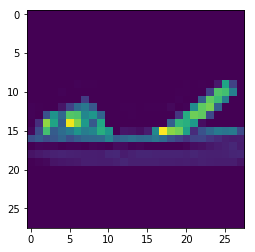

In [5]:
print(y_train_red[34]) # check if the classification is correct
plt.imshow(x_train_red[34]) # Ok the random slice seems to be working fine...

#### Data Exploration

x_train shape: (500, 28, 28) y_train shape: (500,)
500 train set
10000 test set
y = 5 Sandal


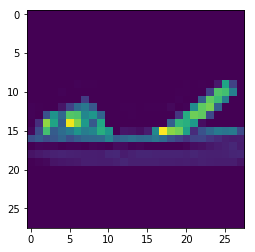

In [6]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train_red.shape, "y_train shape:", y_train_red.shape)

# Print the number of training and test datasets
print(x_train_red.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 34
# y_train contains the lables, ranging from 0 to 9
label_index = y_train_red[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train_red[img_index])

#### Data Normalization

In [7]:
x_train_red = x_train_red.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print("Number of train data - " + str(len(x_train_red)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 500
Number of test data - 10000


### Data Preprocessing

In [8]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train_red = x_train_red.reshape(x_train_red.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train_red = tf.keras.utils.to_categorical(y_train_red, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train_red.shape, "y_train shape:", y_train_red.shape)

# Print the number of training, validation, and test datasets
print(x_train_red.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (500, 28, 28, 1) y_train shape: (500, 10)
500 train set
5000 validation set
10000 test set


#### Model Definition

In [9]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
__________

#### Model Configuration

In [10]:
# Choosing Gradient Descent and loss function
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#### Model Training

In [16]:
from keras.callbacks import ModelCheckpoint
#WARNING Commenting out for writng priviledges
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
#NB: Trivial batch size and epochs for local testing purposes
model.fit(x_train_red,
         y_train_red,
         batch_size=3,
         epochs=2,
         validation_data=(x_test, y_test),
         callbacks=[checkpointer])

Train on 500 samples, validate on 10000 samples
Epoch 1/2
489/500 [============================>.] - ETA: 0s - loss: 0.8429 - acc: 0.6851
Epoch 00001: val_loss improved from inf to 0.71734, saving model to model.weights.best.hdf5
500/500 [==============================] - 10s 20ms/step - loss: 0.8378 - acc: 0.6880 - val_loss: 0.7173 - val_acc: 0.7402
Epoch 2/2
495/500 [============================>.] - ETA: 0s - loss: 0.7458 - acc: 0.7253
Epoch 00002: val_loss did not improve from 0.71734
500/500 [==============================] - 11s 22ms/step - loss: 0.7403 - acc: 0.7280 - val_loss: 0.7335 - val_acc: 0.7302


#### Model Evaluation

In [17]:
# Load the weights with the best validation accuracy - #WARNING Commenting out for writng priviledges
model.load_weights('model.weights.best.hdf5')


In [18]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7402


#### Visualizing predictions

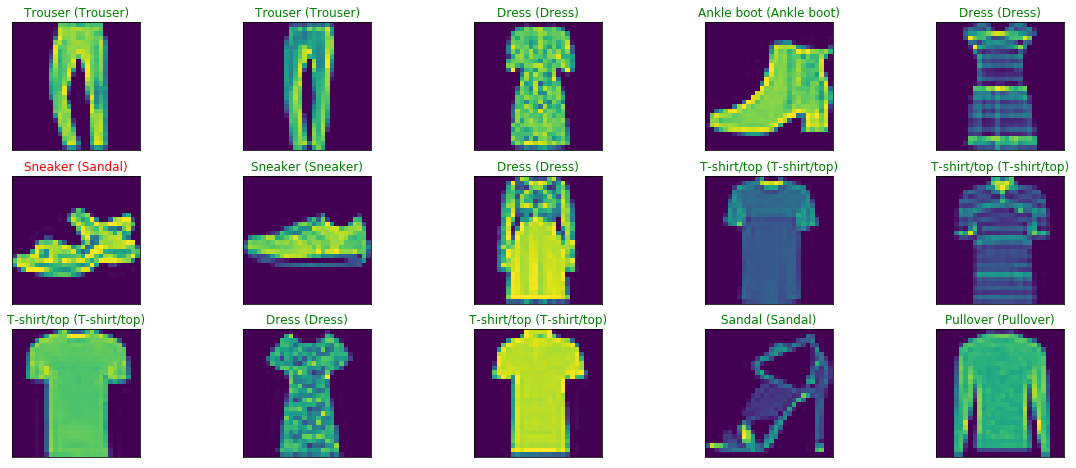

In [19]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))